# Integer Factorization With Shor's Algorithm

This notebook aims to introduce Shor's algorithm and how it can be used to find the prime factor of a given integer $N$. We will first implement the quantum algorithm using Qiskit, then run on a simulator and IBM real quantum device.


## Contents

1. [Introduction](#introduction)

2. [Qiskit Implementation](#implementation)
   - [Simulation](#simulation)
   - [Device](#device)

3. [Problems](#problems)

4. [References](#references)

## 1. Introduction <a id='introduction'></a>
### Background

We are all aware that one of the advantages of quantum computers over conventional computers is speed, we've seen this in many ways such as Grover's algorithm for searching unstructured data. Here, we will be solving a factorization problem on a quantum computer using Shor's algorithm. For instance, given an integer $N$ as an input, we want to find $1$ $<$ $N_1$, $N_2$ $<$ $N$ such that $N$ $=$ $N_1$$N_2$. The present best and well known classical algorithm called general number field sieve (GNFS)  will solve this kind of problem with an exponential running time of $exp $($ \sqrt[3] \frac{64}{9} $+$ $O$ $($ $1$ $)$  ({\ln{n}})^{1/3} ({{\ln}\ln{n}})^{2/3} )$ where $n$ denotes number of bits of $N$. In general, any integers with 1000 or more bits will take the age of the universe to solve on a classical computer. This difficulties of factoring large number on classical hardwares is the basis of security of asymmetric cryptography. 


The development of a quantum algorithm for factorization called Shor's algorithm demonstrates the capability to speed up the same factorisation problems polynomially with a run time $O$$($$n^3$ $\log{n}$$)$ compare to the exponential run time on classical computers as stated above. 

The efficiency of Shor's algorithm is due to the efficiency of the modular exponentiation by repeated squarings, and quantum Fourier transform.

### Shor's Algorithm Description
The centerpiece of Peter Shor’s algorithm detects a period in a function. This section aims to explain method used in factoring an integer using Shor's algorithm and how quantum computer plays a vital role.
#### Reducing factorization to period finding using classical strategy

One of the well known ways of dividing a large integer is by modular exponentiation. The operation of modular exponentiation calculates the remainder when an integer b (the base) raised to the eth power (the exponent), $b^e$, is divided by a positive integer m (the modulus). In symbols, given base b, exponent e, and modulus m, the modular exponentiation c is: ${c = b^e mod}$ $m$. From the definition of $c$, it follows that ${0 ≤ c < m}$. where ${c = b^e}$ $mod$ $m$.

We've seen how modular exponentiation works, you might be thinking of what is the usefulness of this in factorizing large number and implementing it on quantum computer. Below, I will be showing you how this method will help us in finding an important number that will be useful later on in our quantum factorization journey. 

Let say we are given an odd integer ${N = N_1N_2}$, where $1$ $<$ $N_1$, $N_2$ $<$ $N$, we want to find $N_1$ and $N_2$.
To solve this using modular exponentiation:

**Step 1**:  Guess any number $g$ such that $g$ $<$ $N$ and $g$ is not one of the factors of $N$ if possible. 

**Step 2**: Find an even number $p$ such that there exists $p$ $>$ $0$ and $p$ is the smallest of such number so that $g^p$ $=$ $1$ ($mod$ $N$). Therefore,  ${g^{p/2} \pm 1}$ is a better guess than $g$. This is where modular exponentiation came in. An example on how to do this is explained below.

**Step 3**: If we can find such $p$ and $p$ is even, then, $N$ divides $g^p$ $-$ $1$. Note: $g^p$ $-$ $1$ $=$ ($g^{p/2}$ $-$ $1$)($g^{p/2}$ $+$ $1$). Hence, one can factor $N$

To find $p$, we can consider modular exponentiation sequence $A$ $=$ $a_1$, $a_2$,..., where $a_i$ = $g^i$ ($mod$ $N$). Each $a_i$ is a number from the finite set {$0$, $1$, $2$, ..., $N-1$}, and hence there exists indices $q$ and $r$ such that $a_q = a_r$. We will be taking a look at an example below to find period $p$.

For $N$ $=$ $15$, find $N_1$, $N_2$ such that $N$ $=$ $N_1$$N_2$. To solve this, let's follow the steps listed above:

We will be using two different number for $g$ to show that this works for any $g$ you choose so far $g$ $<$ $N$ and $g$ is not a factor of $N$.


##### Example 1:

Step 1:
Let $g$ $=$ $7$  

Step 2:
$a_i$ $=$ $g^i$ ($mod 15$). We will only choose $i$ to be finite set {$0$, $1$, $2$, ..., $N-1$}

-  $a_0$ $=$ $7^0$ ($mod$ $15$) $=$ $1$ $mod$ $15$ $=$ $1$ $mod$ $15$

-  $a_1$ $=$ $7^1$ ($mod$ $15$) $=$ $7$ $mod$ $15$ $=$ $7$ $mod$ $15$

-  $a_2$ $=$ $7^2$ ($mod$ $15$) $=$ $49$ $mod$ $15$ $=$ $4$ $mod$ $15$

-  $a_3$ $=$ $7^3$ ($mod$ $15$) $=$ $343$ $mod$ $15$ $=$ $13$ $mod$ $15$

-  $a_4$ $=$ $7^4$ ($mod$ $15$) $=$ $(4)^2$ $mod$ $15$ $=$ $1$ $mod$ $15$

-  $a_5$ $=$ $7^5$ ($mod$ $15$) $=$ $16807$ $mod$ $15$ $=$ $7$ $mod$ $15$

-  $a_6$ $=$ $7^6 = (7^3)^2$ ($mod$ $15$) $=$ $13^2$ $mod$ $15$ $=$ $4$ $mod$ $15$

We can see a modular exponentiation sequence of ${1,7,4,13,1,7,4, ...}$. We can clearly see that the period, ${p = 4}$


Since we can find $p$, and is even number, we can go on to step 3.

Step 3:
We can apply the above idea to find:

- $7^4$ ($mod$ $15$) $=$ $1$

- $7^4 - 1$ ($mod$ $15$) $=$ $0$

- $(7^2 - 1)(7^2 + 1)$ ($mod$ $15$) $=$ $0$ ($mod$ $15$) 

- $15$ divides $(48)(50)$

We can then compute the factors of $15$ as $gcd(48, 15)$ $=$ $3$ and $gcd(50, 15)$ $=$ $5$


##### Example 2:


Let's try step 2 again, but now we will be using another number for $g$. Let's take $g$ $=$ $11$, since $11$ satisfies the conditions in step 2. This is to show that you can make any crappy guess and still make it a better guess.  

-  $a_0$ $=$ $11^0$ ($mod$ $15$) $=$ $1$ $mod$ $15$ $=$ $1$ $mod$ $15$

-  $a_1$ $=$ $11^1$ ($mod$ $15$) $=$ $11$ $mod$ $15$ $=$ $11$ $mod$ $15$

-  $a_2$ $=$ $11^2$ ($mod$ $15$) $=$ $121$ $mod$ $15$ $=$ $1$ $mod$ $15$

-  $a_3$ $=$ $11^3$ ($mod$ $15$) $=$ $1331$ $mod$ $15$ $=$ $11$ $mod$ $15$

-  $a_4$ $=$ $11^4$ ($mod$ $15$) $=$ $(1)^2$ $mod$ $15$ $=$ $1$ $mod$ $15$

We can see a modular exponentiation sequence of ${1,11,1,11,1, ...}$. We can clearly see that the period, ${p = 2}$


Since we can find $p$, and is even number, we can go on to step 3.

Step 3:
We can apply the above idea to find:

- $11^2$ ($mod$ $15$) $=$ $1$

- $11^2 - 1$ ($mod$ $15$) $=$ $0$

- $(11 - 1)(11 + 1)$ ($mod$ $15$) $=$ $0$ ($mod$ $15$) 

- $15$ divides $(10)(12)$

We can then compute the factors of $15$ as $gcd(10, 15)$ $=$ $5$ and $gcd(12, 15)$ $=$ $3$

There is still a chance the value of $p$ may be unsuitable—that is, that the
original $g$ was an unlucky choice. In this case, we must begin again in step 1 with another guess value of $g$. But otherwise the value of $p$ provides the only needed input to a final classical stage that yields a verifiable solution to the problem about $N$


Finding $p$ is, however, difficult classically than directly searching for factors of $N$, since one may need to check as many as $\sqrt{N}$ different values of $i$ before encountering any sequential pattern, that gives us $1$ $mod$ $N$. For the case where $N$ is large $N$ $=$ $3^{2006787}$, it is almost impossible to find $p$ classically such that $g^p$ $=$ $1$ ($mod$ $N$). However, with quantum computing, $p$ can be found in polynomial time using the Quantum Fourier Transform $(QFT)$. In the next section, we will be going through the explanation about the quantum strategy of finding period $p$.




#### Reducing factorization to period finding using Quantum strategy
#####  Quantum Fourier Transform


The quantum Fourier transform $(QFT)$ is the classical discrete Fourier transform applied to the vector of amplitudes of a quantum state, where we usually consider vectors of length $N$ $=$ $2^n$ where $n$ is the number of qubits. To simply things, we can say $(QFT)$ is a linear transformation on quantum bits, and is the quantum analogue of the inverse discrete Fourier transform. We can use Hadamard gates and controlled phase shift gates to implement its circuit.

The classical discrete Fourier transform acts on vector ($a_0$, $a_1$, $a_2$, ..., $a_{N-1}$) and maps it to the vector ($b_0$, $b_1$, $b_2$, ..., $b_{N-1}$).

Similarly, quantum Fourier transform acts on a quantum state $QFT$ $|x>$ $=$  $QFT$ ${(\sum \limits _{i=0} ^{N-1} {x_i|i>})}$ and maps it to the quantum state $ \sum \limits _{i=0} ^{N-1} {y_i|i>}  $ according to the formula 

${y_k =  \sum \limits _{i=0} ^{N-1} {x_n w_{N-1}^{kn}}}$, ${k = 0,1,2,3, ..., N-1}$ where ${w_N = e^{2n/N}}$




The property of QFT that is essential for the factorization algorithm is that it can “compute” the $p$ for a given input.

To implement a period finding circuit for solving the integer factorization problem. We will be following series of steps:

**Step 1**: We will implement two registers, reigster $A$ (input register) with $n$ qubits and $B$ (output register) with $m$ qubits, where ${m=2n}$ and ${M =2^m}$. 

**Step 2**: The second step is the most detailed one in the algorithm and requires a quantum
network of gates. Specifically it computes the function ${ f(x) = A_x mod N }$, stores it in the output register. The initial state of the computer now is:

${ |\psi_1> = 2^{-(m+n)/2}|0>_0|0>_1...|0>_{n-1}|0>_0|0>_1|0>_{m-1}}$ indicating that both the input and output registers have been set to $0$. When each qubit in the input register is rotated by $ {\pi/4}$, we will have the form:

${ I = {1/ \sqrt M}(|0>+|1>)_0(|0>+|1>)_1...(|0>+|1>)_{n-1}}$, where ${M = 2^n}. This can be written as:

$ {I = {1/ \sqrt M} \sum \limits _{j=0} ^{M-1} {|j>} } $ and the state of the computer as:


$ {|\psi_2> = {1/ \sqrt M} \sum \limits _{j=0} ^{M-1} {|j>|0>} } $

**Step 3**: Next, function ${ f(x) = A_x mod N }$ is evaluated and the result stored in the output register. The state of the computer now is:

$ {|\psi_3> = {1/ \sqrt M} \sum \limits _{j=0} ^{M-1} {|j>|A^j mod N>} } $. This can be written as:


$ {|\psi_3> = {1/ \sqrt M} \sum \limits _{l=0} ^{r-1} \sum \limits _{q=0} ^{s_l} {|qr+l>|A^j mod N>} } $. Where $r$ is the periodicity we are looking for.

**Step 4**:  Finally, a quantum Fourier transform is applied to the input register. The state of the computer is now:

$ {|\psi_4> = {1/ \sqrt M} \sum \limits _{l=0} ^{r-1} \sum \limits _{q=0} ^{s_l} {1/ \sqrt n} \sum \limits _{p=0} ^{M-1} e^{2{\pi}ip(qr+l)/n}{|p>|A^l mod N>} } $

When this step is completed the calculation is done and all that remains to do is to
extract relevant information from the machine to determine if possible $r$, the order of ${A_l mod N}$, and if it is possible, to obtain factors of $N$ from this information and, if not,
repeat a similar calculation in order to obtain more information.

**Example:** In order to see how the results of the computation are obtained via measurement it
is useful to consider the much discussed simplest example of factoring ${3x5 = 15.}$

**Step 1&2:** We will be representing the input and output registers by 4 qubits each; i.e ${n = m = 4}$. The state of the input register just before evaluating function ${ f(x) = A_x mod N }$ will be given by $ {I = {1/ \sqrt M} \sum \limits _{j=0} ^{M-1} {|j>} } $. 

**Step 3:** Evaluating function ${ f(x) = A_x mod N }$ using ${A = 7}$, Writing ths state of the computer we have:

$ {|\psi_3> 1/4((|0> + |4> + |8> +|12>)|1>) 
              + (|1> + |5> + |9> +|13>)|7>)
              + (|2> + |6> + |10> +|14>)|4>)
              + (|3> + |7> + |11> +|15>)|13>)}$
              
**Step 4:** Performing Fourier Transform we have:

$ {|\psi_4> 1/4((|0> + |4> + |8> +|12>)|1>) 
              + (|0> + i|4> -|8> -i|12>)|7>)
              + (|0> - |4> + |8 -|12>)|4>)
              + (|0> -i|4> - |8> +i|12>)|13>)}$
              

One reason for writing this out is to call attention to the fact that performing the
Fourier transform actually enhances the probability of measuring a particular value in the
input register. If we measure after the transform we can only obtain the values ${0,4, 8 and
12 }$, each with probabilities $¼$. If we measured before the transform we could obtain any
value from 0 to 15 with probability $1/16$ for each value. 

In the above example ,
measurement of the output register would yield either 1,7,4 or 13 each with a probability
of ¼. 

It's time for implementation.

## 2. Qiskit Implementation <a id='implementation'></a>


In [ ]:

import math

# importing Qiskit
from qiskit import *

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

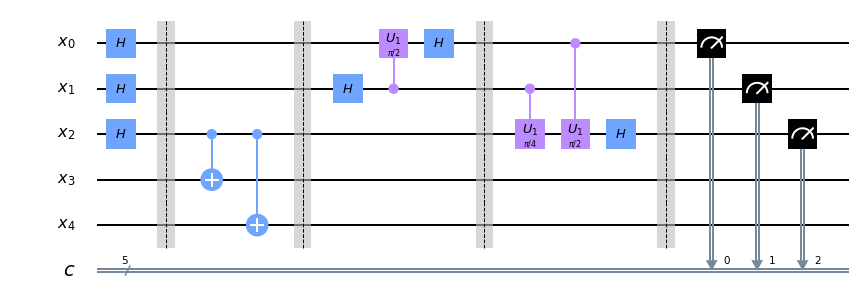

In [15]:
n =5
qreg = QuantumRegister(n, 'x')
creg = ClassicalRegister(n, 'c')
circ = QuantumCircuit(qreg, creg)
for i in range(n-2):
    circ.h(i)
circ.barrier()

circ.cx(qreg[2], qreg[3])
circ.cx(qreg[2], qreg[4])
circ.barrier()

circ.h(qreg[1])
circ.cu1(math.pi/ 2, qreg[1], qreg[0])
circ.h(qreg[0])
circ.barrier()

circ.cu1(math.pi/ 4, qreg[1], qreg[2])
circ.cu1(math.pi/ 2, qreg[0], qreg[2])
circ.h(qreg[2])
circ.barrier()
for i in range(n-2):
    circ.measure(qreg[i], creg[i])
circ.draw(output='mpl')


## Running on a simulator <a id='simulator'></a>

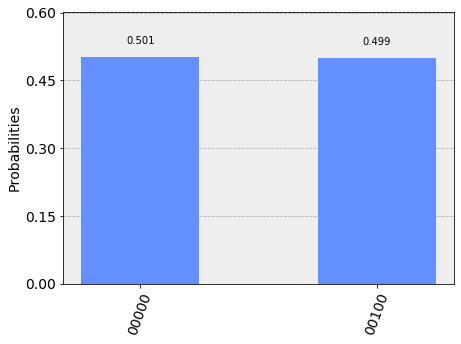

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(circ, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## Running Shor's algorithm on real quantum hardware <a id='device'></a>

In [19]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.save_account('')
# Load local account information
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
quantumcomputer = provider.get_backend('ibmqx2')
job = execute(circ, backend=quantumcomputer)

C:\Users\esobi\Anaconda3\lib\site-packages\qiskit\providers\ibmq\credentials\configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '
C:\Users\esobi\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


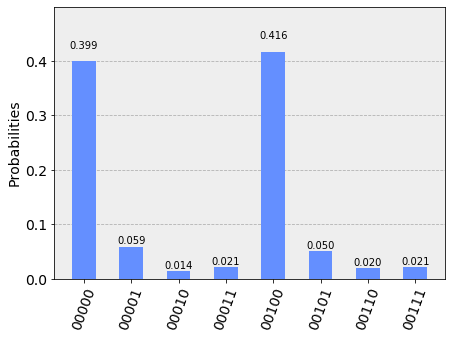

In [18]:
result = job.result()
plot_histogram(result.get_counts(circ))

The periods found by the simulator and real quantum device are $r = 0$, which is ignored, and $r = 4$, which is what we will be using.
Since $M = 8$, we can conclude ${p = M/r = 8/4 = 2}$. Then $15$ divides ${(x^p - 1) = (11^2 - 1) = (11-1)(11+1) = 10*12}$. By computing ${gcd(15,10) = 5}$ and ${gcd(15,12) = 3}$, we find the factors of $15$. 


The general-case circuit for Shor’s algorithm for factorization of the number 15 is too large, both with respect to the number of qubits as well as the number of gates, to be implemented on a 5-qubit processor. We were able to implement a compiled optimized version that produced correct results.

As we see that there are a few results from the other three states when run in a real quantum computer. These arise due to errors in the gates that were applied.

## 3. Problems <a id='problems'></a>

1. The above implementation of Shor's algorithm was tested by using ${N = 15}$ and ${x = 11}$. Implement the same $N$ using ${x = 7}$
2. The above implementation of Shor's algorithm was tested by using ${N = 15}$ and ${x = 11}$. Implement the same ${N = 21}$ using any guess number, $x$.

## 4. References <a id='references'></a>
1. L. M. K. Vandersypen, M. Steffen, G. Breyta, C. S. Yannoni, M. H. Sherwood, and I. L. Chuang. Experimental realization
of Shor’s quantum factoring algorithm using nuclear magnetic resonance. Nature (London) , 414:883–887, December 2001.
2. M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).